In [1]:
# conda init conda activate ARKMIND

usage: conda init [-h] [--all] [--user] [--no-user] [--system] [--reverse]
                  [--json] [-v] [-q] [-d]
                  [SHELLS ...]
conda init: error: argument SHELLS: invalid choice: 'conda' (choose from 'bash', 'fish', 'tcsh', 'xonsh', 'zsh', 'powershell')

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from itertools import product
from imblearn.over_sampling import SMOTE
from IPython.display import display

## Data Collection

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head(10)

,id,ela,financeAmount,address1,address2,address3,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,JABOR,TERENGGANU,CUKAI,24000.0,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,TAMAN NEOCYBER,SELANGOR,CYBERJAYA,63000.0,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,NaN,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,BUKIT SELAMBAU,KEDAH,SUNGAI PETANI,8010.0,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,PT 2326,TAMAN ROS SETIA,JUASSEH,NEGERI SEMBILAN,KUALA PILAH,72500.0,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION
5,01a402d8-9f3a-4385-ab58-ee1c6928ce93,40000.0,10000.0,110 LORONG 2 TAMAN BAKAR ARANG,NaN,NaN,KEDAH,SUNGAI PETANI,8000.0,REJECTED,5000.0,24,18,10000,MANAGER,DEBTS CONSOLIDATION
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,3000.0,3000.0,NO.47 TAMAN SUNGAI TENGAH,LORONG SUNGAI TENGAH 2B1,JALAN SUNGAI TENGAH MATANG,SARAWAK,KUCHING,93050.0,REJECTED,3754.0,24,18,5000,TEACHER,EDUCATION
7,01b74664-72a7-43b1-bd51-82c6dc17299a,12000.0,1000.0,KM 7.6 JALAN TEBING TINGGI 1,BUKIT KATIL,MELAKA,MELAKA,AYER KEROH,75450.0,REJECTED,2081.0,12,18,1000,DRIVER,RENOVATION
8,01ddc10b-5a18-41bb-b5dd-0e0064a9b55f,15000.0,2000.0,LOT 223-D,KAMPUNG JIMAH LAMA,NaN,NEGERI SEMBILAN,SEREMBAN,71950.0,APPROVED,2000.0,18,18,2500,LOGISTICS AND PLANNING ASSISTANT,OTHER USAGE
9,02076436-bde5-4eef-856e-2042ef045ef9,25000.0,2000.0,"LOT 6063D, JALAN SELAMAT,","KAMPUNG SUNGAI RAMAL DALAM,",43000 KAJANG,SELANGOR,KAJANG,43000.0,REJECTED,3400.0,18,18,2000,GROUP CORPORATE COMMUNICATION EXECUTIVE,DEBTS CONSOLIDATION


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   object 
 1   ela                939 non-null    float64
 2   financeAmount      939 non-null    float64
 3   address1           998 non-null    object 
 4   address2           862 non-null    object 
 5   address3           416 non-null    object 
 6   state              1000 non-null   object 
 7   city               1000 non-null   object 
 8   postcode           976 non-null    float64
 9   applicationStatus  1000 non-null   object 
 10  netSalary          1000 non-null   float64
 11  loanTenure         1000 non-null   int64  
 12  interestRate       1000 non-null   int64  
 13  loanApplied        1000 non-null   int64  
 14  jobTitle           1000 non-null   object 
 15  loanReason         1000 non-null   object 
dtypes: float64(4), int64(3), 

## Data Cleaning

In [6]:
df.shape

(1000, 16)

### Check null values for each column

In [7]:
df.isnull().sum()

id                     0
ela                   61
financeAmount         61
address1               2
address2             138
address3             584
state                  0
city                   0
postcode              24
applicationStatus      0
netSalary              0
loanTenure             0
interestRate           0
loanApplied            0
jobTitle               0
loanReason             0
dtype: int64

### Drop columns with >50% of missing values

In [8]:
df = df.drop(columns=['address3'])

### Fill in missing values

#### Address

##### Check rows that have null values in address1 and address2

In [9]:
rows_with_null_address1 = df[df['address1'].isnull()]
rows_with_null_address1

,id,ela,financeAmount,address1,address2,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
468,4c564927-571e-4666-ab39-75af3cac2d37,0.0,0.0,NaN,NaN,MELAKA,MERLIMAU,77300.0,REJECTED,2729.0,24,18,3000,NURSE,DEBTS CONSOLIDATION
590,5e80dc03-8a89-4010-94b2-b3adad634caf,10000.0,2000.0,NaN,NaN,PERAK,IPOH,30020.0,REJECTED,4879.0,24,18,2000,JURUTERAPI PERGIGIAN,EDUCATION


In [10]:
rows_with_null_address2 = df[df['address2'].isnull()]
rows_with_null_address2.head(10)

,id,ela,financeAmount,address1,address2,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,KELANTAN,KOTA BHARU,16150.0,REJECTED,4000.00,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION
5,01a402d8-9f3a-4385-ab58-ee1c6928ce93,40000.0,10000.0,110 LORONG 2 TAMAN BAKAR ARANG,NaN,KEDAH,SUNGAI PETANI,8000.0,REJECTED,5000.00,24,18,10000,MANAGER,DEBTS CONSOLIDATION
10,0222c6e4-0952-4053-874b-583cdffe08b9,17000.0,8500.0,NO 10090 KAMPUNG KUBANG MENERONG,NaN,PENANG,TASEK GELUGOR,13300.0,REJECTED,2500.00,24,18,8500,MANFACTURING SPECIALIST,DEBTS CONSOLIDATION
13,02a86c16-8c39-405a-94d0-5e14ac11f8eb,18000.0,1500.0,A2-3-8 HALAMAN AREKA LEBUH NIPQH,NaN,PENANG,BAYAN LEPAS,11900.0,REJECTED,2050.00,24,18,1500,CLERK,OTHER USAGE
26,04122648-23a3-4eee-82e5-6b55ffe9a00b,9000.0,2500.0,A-106 FELDA RAYA JENGKA 14,NaN,PAHANG,BANDAR PUSAT JENGKA,26400.0,APPROVED,1880.00,24,18,2500,ASSISTANT NURSE,OTHER USAGE
40,06f2d047-ae4b-4a8b-b859-2631b4117acd,0.0,0.0,B-G-10 PERSIARAN SEKSYEN 6/9 BANDAR PUTRA BERTAM,NaN,PENANG,KEPALA BATAS,13200.0,REJECTED,1500.00,6,18,1800,TUKANG KEBUN,EDUCATION
49,0851c632-732d-465c-8854-3e539158c2ec,7000.0,1000.0,TBP 3314 BAGAN JERMAL,NaN,PENANG,BUTTERWORTH,12300.0,APPROVED,1600.00,12,18,2000,OPERATOR,OTHER USAGE
55,0901e204-bcae-454b-ac75-37e9e046d40c,0.0,0.0,KG BUKIT RAYA DALAM,NaN,KEDAH,PENDANG,6700.0,REJECTED,3019.83,24,18,2000,PRISONER,EDUCATION
59,0a381629-7900-4aa8-ab9e-15027cabc94d,15000.0,1500.0,NO.22 JALAN P14D 2/1,NaN,PUTRAJAYA,PUTRAJAYA,62050.0,REJECTED,5057.35,24,18,1500,SECRETARY,EDUCATION
70,0bfb1164-84d0-43d5-ab6b-0fcc959131ba,20000.0,5000.0,NO 56 TAMAN SERI WANGSA,NaN,PERAK,SERI MANJUNG,32040.0,REJECTED,3092.00,24,18,5000,FIELD SURVEYOR,EDUCATION


##### Fill null addresses with Unknown

In [11]:
df['address1'].fillna('Unknown', inplace=True)

##### Join address1 and address2 into address

In [12]:
def join_addresses(row):
    addresses = [row['address1'], row['address2']]
    
    addresses = [addr for addr in addresses if pd.notnull(addr)]
    
    full_address = ', '.join(addresses)
    
    full_address = full_address.replace(',,', ',')

    full_address = ', '.join(part.strip() for part in full_address.split(','))
        
    return full_address

df['address'] = df.apply(join_addresses, axis=1)

df[['address1', 'address2', 'address']].head(10)

,address1,address2,address
0,PT 2344 JLN SRI PERASING,4/2 TMN SRI PERASING JAYA,"PT 2344 JLN SRI PERASING, 4/2 TMN SRI PERASING..."
1,UNIT A-11-9 DOMAIN 2,LINGKARAN CYBER POINT BARAT,"UNIT A-11-9 DOMAIN 2, LINGKARAN CYBER POINT BARAT"
2,"3346JLN PASIR PUTEH,KG TEMBESU LIMBAT",NaN,"3346JLN PASIR PUTEH, KG TEMBESU LIMBAT"
3,"NO 1319, JALAN CEMPAKA INDAH 16",TAMAN CEMPAKA INDAH,"NO 1319, JALAN CEMPAKA INDAH 16, TAMAN CEMPAKA..."
4,PT 2326,TAMAN ROS SETIA,"PT 2326, TAMAN ROS SETIA"
5,110 LORONG 2 TAMAN BAKAR ARANG,NaN,110 LORONG 2 TAMAN BAKAR ARANG
6,NO.47 TAMAN SUNGAI TENGAH,LORONG SUNGAI TENGAH 2B1,"NO.47 TAMAN SUNGAI TENGAH, LORONG SUNGAI TENGA..."
7,KM 7.6 JALAN TEBING TINGGI 1,BUKIT KATIL,"KM 7.6 JALAN TEBING TINGGI 1, BUKIT KATIL"
8,LOT 223-D,KAMPUNG JIMAH LAMA,"LOT 223-D, KAMPUNG JIMAH LAMA"
9,"LOT 6063D, JALAN SELAMAT,","KAMPUNG SUNGAI RAMAL DALAM,","LOT 6063D, JALAN SELAMAT, KAMPUNG SUNGAI RAMAL..."


##### Drop address1, address2

In [13]:
df = df.drop(columns=['address1', 'address2'])

##### Check null data for each row

In [14]:
df_copy = df.copy()

df_copy["Total_Empty_Columns"] = df_copy.apply(lambda x: x.isnull().sum(), axis=1)

counts = sorted(df_copy["Total_Empty_Columns"].unique())

for i in counts:
    print(f'{len(df_copy.loc[df_copy["Total_Empty_Columns"] == i])} rows with {i} missing columns')

916 rows with 0 missing columns
23 rows with 1 missing columns
60 rows with 2 missing columns
1 rows with 3 missing columns


##### Check rows with 3 missing columns

In [15]:
rows_with_3_missing = df_copy[df_copy["Total_Empty_Columns"] == 3]
rows_with_3_missing

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,address,Total_Empty_Columns
482,4e5226d3-8e86-486e-af47-ee949c27c114,NaN,NaN,PERAK,ULU KINTA,NaN,REJECTED,3885.54,24,18,10000,KOPERAL,RENOVATION,"BLOK P 4-6, BATALION 1 PGA",3


##### Check rows with 2 missing columns

In [16]:
rows_with_2_missing = df_copy[df_copy["Total_Empty_Columns"] == 2]
rows_with_2_missing

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,address,Total_Empty_Columns
15,02c912c4-bb44-4028-88cb-f62814894137,NaN,NaN,JOHOR,JOHOR BAHRU,80250.0,REJECTED,2100.00,24,18,5000,PARTS ASSISTANT,RENOVATION,"802 BLOK C TINGKAT 8, KUARTERS FRU POLIS DEPOH",2
17,02f0b3b1-52e4-4051-b71e-d0994fc9f337,NaN,NaN,KUALA LUMPUR,KUALA LUMPUR,57000.0,REJECTED,2000.00,24,18,10000,CASHIER,DEBTS CONSOLIDATION,"77 JALAN 3/149D BANDAR BARU, SERI PETALING",2
25,03f3bceb-0d7d-4893-b01a-3bfa9c0de8dd,NaN,NaN,SELANGOR,PETALING JAYA,46150.0,REJECTED,3500.00,6,18,1100,BUILDING EXECUTIVE,DEBTS CONSOLIDATION,"F-9-24, MENTARI COURT",2
30,04dd3aff-5539-459d-8966-4bc55fc06a64,NaN,NaN,PAHANG,BANDAR PUSAT JENGKA,26400.0,REJECTED,6725.51,24,18,10000,PHARMACIST,EXPAND BUSINESS,"RL116 JALAN RESTU, RANTAU PERINTIS",2
52,08a39ec5-7e7d-48af-857d-84d696207de6,NaN,NaN,NEGERI SEMBILAN,REMBAU,71400.0,REJECTED,3000.00,24,18,10000,COURIER,RENOVATION,"NO 109 JALAN P.I 3, TAMAN PEDAS INDAH",2
81,0d25a9f0-8b5b-4974-828c-758e3e3aeab4,NaN,NaN,JOHOR,BATU PAHAT,83000.0,REJECTED,4000.00,24,18,3500,SALES,RENOVATION,"18A, LORONG A, PARIT KANGKONG",2
101,0f89d03a-c022-406c-8be2-004395a90eda,NaN,NaN,MELAKA,MELAKA,75250.0,REJECTED,1308.27,24,18,6000,ACCOUNT CUM ADMIN,MEDICAL EXPENSES,"NO.48, JALAN RI 6, TAMAN RAMBAI IDAMAN",2
115,12351146-bd8b-40e2-9545-7a5dc0ed8d47,NaN,NaN,SELANGOR,PUCHONG,47180.0,REJECTED,3300.00,24,18,10000,PRODUCTION EXECUTIVE,DEBTS CONSOLIDATION,"21, JALAN BK3/5",2
122,12bd4297-c3eb-4dd9-807f-2bd2630c3a07,NaN,NaN,JOHOR,SEGAMAT,85000.0,REJECTED,1666.17,24,18,10000,GURU,EXPAND BUSINESS,"NO 15, JLN PUTRA 3/1",2
143,15eef78c-9697-4ba1-a47f-5c72eff491d0,NaN,NaN,SABAH,BEAUFORT,89800.0,REJECTED,1000.00,24,18,2000,X,DEBTS CONSOLIDATION,KG. LINGKUNGAN LAUT,2


#### ela & finance amount

In [17]:
rows_with_null_ela_and_finance = df[df['ela'].isnull() & df['financeAmount'].isnull()]
rows_with_null_ela_and_finance

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,address
15,02c912c4-bb44-4028-88cb-f62814894137,NaN,NaN,JOHOR,JOHOR BAHRU,80250.0,REJECTED,2100.00,24,18,5000,PARTS ASSISTANT,RENOVATION,"802 BLOK C TINGKAT 8, KUARTERS FRU POLIS DEPOH"
17,02f0b3b1-52e4-4051-b71e-d0994fc9f337,NaN,NaN,KUALA LUMPUR,KUALA LUMPUR,57000.0,REJECTED,2000.00,24,18,10000,CASHIER,DEBTS CONSOLIDATION,"77 JALAN 3/149D BANDAR BARU, SERI PETALING"
25,03f3bceb-0d7d-4893-b01a-3bfa9c0de8dd,NaN,NaN,SELANGOR,PETALING JAYA,46150.0,REJECTED,3500.00,6,18,1100,BUILDING EXECUTIVE,DEBTS CONSOLIDATION,"F-9-24, MENTARI COURT"
30,04dd3aff-5539-459d-8966-4bc55fc06a64,NaN,NaN,PAHANG,BANDAR PUSAT JENGKA,26400.0,REJECTED,6725.51,24,18,10000,PHARMACIST,EXPAND BUSINESS,"RL116 JALAN RESTU, RANTAU PERINTIS"
52,08a39ec5-7e7d-48af-857d-84d696207de6,NaN,NaN,NEGERI SEMBILAN,REMBAU,71400.0,REJECTED,3000.00,24,18,10000,COURIER,RENOVATION,"NO 109 JALAN P.I 3, TAMAN PEDAS INDAH"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,9a2c2405-3f19-458a-89b5-c804e56959b7,NaN,NaN,JOHOR,PALOH,86600.0,REJECTED,3600.00,24,18,5000,CAR COURIER,EDUCATION,"NO 58A, JALAN PERDANA, KAMPUNG MUHIBBAH,"
962,9c853373-ba24-4979-b133-37ac73bd8764,NaN,NaN,KEDAH,ALOR SETAR,5460.0,REJECTED,3900.00,24,18,10000,SALES,OTHER USAGE,"NO 57 TAMAN TERATAI, JALAN LANGGAR, 05460 ALOR..."
979,9f67d4f9-8ea2-49fb-b6e1-e96050203c3f,NaN,NaN,KEDAH,ALOR SETAR,5400.0,REJECTED,1500.00,24,18,5000,JURUTEKNIK,DEBTS CONSOLIDATION,"NO, 61, JLN BUKIT MUTIARA 4"
989,a103b295-cf07-4a31-a8dc-12950e8ac0e8,NaN,NaN,JOHOR,ISKANDAR PUTERI,79200.0,REJECTED,1787.00,24,18,1500,ON BOARD CLERK,OTHER USAGE,"A11-1-06, JALAN PRISMA 1"


In [18]:
df['ela'] = df['ela'].fillna(0)
df['financeAmount'] = df['financeAmount'].fillna(0)

#### Postcode

In [19]:
rows_with_null_postcode = df[df['postcode'].isnull()]
rows_with_null_postcode

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,address
80,0ce8e525-a902-4809-b1b3-efb568378946,28000.0,10000.0,SELANGOR,BANTING,NaN,REJECTED,2710.00,24,18,10000,DRIVER LORRY,OTHER USAGE,"NO 3 JALAN BB 4/10, TAMAN BANTING BARU"
167,19b325ad-a58b-4015-8b11-c7ceb5eac9cf,49000.0,5000.0,NEGERI SEMBILAN,NILAI,NaN,REJECTED,3973.85,24,18,5000,SENIOR TRAINER,OTHER USAGE,"LOT: 3063, KAMPUNG JIJAN"
276,29e5abd2-5120-4b16-8726-25469ad792d9,40000.0,10000.0,PENANG,PULAU PINANG,NaN,REJECTED,3264.00,24,18,10000,SITE SUPERVISOR,MEDICAL EXPENSES,"1-17-28, JALAN VETERINARY"
292,2c40878b-aa10-4b65-b27a-9b55dbaba256,0.0,5000.0,PENANG,TASEK GELUGOR,NaN,APPROVED,1800.00,24,18,10000,MARKETING,OTHER USAGE,"NO 4250, KAMPUNG SELAMAT"
318,3110c474-f4b6-4474-968a-bb0cf1030d5e,0.0,0.0,PAHANG,KUANTAN,NaN,REJECTED,2175.00,24,18,3000,EXECUTIVE OFFICER,OTHER USAGE,"NO.10, LORONG IS98, PERKAMPUNGAN INDERA SEMPURNA"
319,31112aa7-6570-4640-9afc-b2ccca57065c,5000.0,5000.0,SELANGOR,PETALING JAYA,NaN,APPROVED,2300.00,18,18,10000,GROUP SOUS CHEF,EDUCATION,"NO.107 BLOCK F, PANGSAPURI PKNS, JALAN SS6/1 K..."
398,3f04355e-9d29-40b5-9cd5-2382bc4e7081,61000.0,10000.0,PAHANG,KUANTAN,NaN,REJECTED,5000.00,24,18,10000,MANAGER,EXPAND BUSINESS,"NO 5, LORONG SERI SETALI 85"
479,4e024526-8899-4c3a-b0ee-5fd9672bf161,6000.0,3600.0,SELANGOR,BANTING,NaN,REJECTED,1670.00,24,18,3600,DRIVER LORI,DEBTS CONSOLIDATION,"LOT 3827 D JALAN MUHIBBAH, KAMPONG LABOHAN DAGANG"
482,4e5226d3-8e86-486e-af47-ee949c27c114,0.0,0.0,PERAK,ULU KINTA,NaN,REJECTED,3885.54,24,18,10000,KOPERAL,RENOVATION,"BLOK P 4-6, BATALION 1 PGA"
501,508afd39-2b79-4e9b-a565-d301494ad45c,17000.0,7000.0,PAHANG,KUANTAN,NaN,REJECTED,1800.00,24,18,7000,PRODUCTION ( PACKERMAN ),DEBTS CONSOLIDATION,"NO 27, LORONG 20"


In [20]:
postcode_mapping = {
    'TAMAN BANTING BARU': '42700',
    'KAMPUNG JIJAN': '71800',
    'JALAN VETERINARY': '10150',
    'KAMPUNG SELAMAT' : '13300',
    'PERKAMPUNGAN INDERA SEMPURNA' : '25150',
    'SS6/1' : '47301',
    'LORONG SERI SETALI 85' : '25300',
    'KAMPONG LABOHAN DAGANG' : '42700',
    'BATALION 1 PGA' : '31150',
    'LORONG 20' : '26080',
    'MK D JALAN BHARU' : '11000',
    'TAMAN BERTAM IMPIAN' : '76450',
    'BANDAR PUTRA BERTAM' : '13200',
    'TAMAN JATI' : '48000',
    'TAMAN SRI UTAMA' : '06000',
    'TAMAN SIMPANG RENGGAM' : '86200',
    'JALAN DATARAN 2/5' : '81200',
    'JALAN KENYALANG, KOTA DAMANSARA' : '47810',
    'NANGA BEKAKAP IRAN' : '96850',
    'PERUMAHAN POLIS SERIAB' : '01000',
    'JALAN DAMANSARA EMPIRE CITY' : '47820',
    'GOMBAK' : '53100',
    'BANDAR LAHAT MINES' : '31500',
    'TELOK GADONG KECIL' : '41250'
}

In [21]:
def fill_postcode_based_on_address(row, mapping):
    if pd.isnull(row['postcode']):
        for keyword, postcode in mapping.items():
            if keyword.lower() in row['address'].lower():
                return postcode
    return row['postcode']

df['postcode'] = df.apply(lambda row: fill_postcode_based_on_address(row, postcode_mapping), axis=1)

print(df[df['postcode'].isnull()]) 

df['postcode'] = df['postcode'].astype('int64')

df['postcode'] = df['postcode'].apply(lambda x: str(x).zfill(5))

df.head(10)

Empty DataFrame
Columns: [id, ela, financeAmount, state, city, postcode, applicationStatus, netSalary, loanTenure, interestRate, loanApplied, jobTitle, loanReason, address]
Index: []


,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,address
0,007205fb-fde6-4d04-9778-5ae2d4b8c9f1,5000.0,5000.0,TERENGGANU,CUKAI,24000,REJECTED,1900.0,18,18,5000,ADMIN CLERK,DEBTS CONSOLIDATION,"PT 2344 JLN SRI PERASING, 4/2 TMN SRI PERASING..."
1,007696e0-6d33-4e55-a48a-17797191bdde,0.0,0.0,SELANGOR,CYBERJAYA,63000,REJECTED,7260.0,24,18,10000,MANAGER OPERATION,RENOVATION,"UNIT A-11-9 DOMAIN 2, LINGKARAN CYBER POINT BARAT"
2,00ec2449-39df-4018-881c-2185dcaea9ab,49000.0,6000.0,KELANTAN,KOTA BHARU,16150,REJECTED,4000.0,24,18,6000,SALE ADVISOR,DEBTS CONSOLIDATION,"3346JLN PASIR PUTEH, KG TEMBESU LIMBAT"
3,0122f896-fc97-46bf-8408-de443cfa6c63,6000.0,1000.0,KEDAH,SUNGAI PETANI,08010,APPROVED,1200.0,12,18,1500,CUSTOMER SERVICE,DEBTS CONSOLIDATION,"NO 1319, JALAN CEMPAKA INDAH 16, TAMAN CEMPAKA..."
4,0131b663-f9c9-40fc-9149-c110e4cc4a22,0.0,0.0,NEGERI SEMBILAN,KUALA PILAH,72500,REJECTED,3948.0,24,18,5000,CLERK,DEBTS CONSOLIDATION,"PT 2326, TAMAN ROS SETIA"
5,01a402d8-9f3a-4385-ab58-ee1c6928ce93,40000.0,10000.0,KEDAH,SUNGAI PETANI,08000,REJECTED,5000.0,24,18,10000,MANAGER,DEBTS CONSOLIDATION,110 LORONG 2 TAMAN BAKAR ARANG
6,01b2377a-0bfd-453f-a5c9-48f708aeed81,3000.0,3000.0,SARAWAK,KUCHING,93050,REJECTED,3754.0,24,18,5000,TEACHER,EDUCATION,"NO.47 TAMAN SUNGAI TENGAH, LORONG SUNGAI TENGA..."
7,01b74664-72a7-43b1-bd51-82c6dc17299a,12000.0,1000.0,MELAKA,AYER KEROH,75450,REJECTED,2081.0,12,18,1000,DRIVER,RENOVATION,"KM 7.6 JALAN TEBING TINGGI 1, BUKIT KATIL"
8,01ddc10b-5a18-41bb-b5dd-0e0064a9b55f,15000.0,2000.0,NEGERI SEMBILAN,SEREMBAN,71950,APPROVED,2000.0,18,18,2500,LOGISTICS AND PLANNING ASSISTANT,OTHER USAGE,"LOT 223-D, KAMPUNG JIMAH LAMA"
9,02076436-bde5-4eef-856e-2042ef045ef9,25000.0,2000.0,SELANGOR,KAJANG,43000,REJECTED,3400.0,18,18,2000,GROUP CORPORATE COMMUNICATION EXECUTIVE,DEBTS CONSOLIDATION,"LOT 6063D, JALAN SELAMAT, KAMPUNG SUNGAI RAMAL..."


### Fixing Faulty Data

In [22]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Unique values: {unique_values}\n")

Column: id
Number of unique values: 1000
Unique values: ['007205fb-fde6-4d04-9778-5ae2d4b8c9f1'
 '007696e0-6d33-4e55-a48a-17797191bdde'
 '00ec2449-39df-4018-881c-2185dcaea9ab'
 '0122f896-fc97-46bf-8408-de443cfa6c63'
 '0131b663-f9c9-40fc-9149-c110e4cc4a22'
 '01a402d8-9f3a-4385-ab58-ee1c6928ce93'
 '01b2377a-0bfd-453f-a5c9-48f708aeed81'
 '01b74664-72a7-43b1-bd51-82c6dc17299a'
 '01ddc10b-5a18-41bb-b5dd-0e0064a9b55f'
 '02076436-bde5-4eef-856e-2042ef045ef9'
 '0222c6e4-0952-4053-874b-583cdffe08b9'
 '027e70af-482c-4231-b0ea-aa76e6dfd711'
 '028ff878-50b4-4363-8bd3-363988c04056'
 '02a86c16-8c39-405a-94d0-5e14ac11f8eb'
 '02bc7b9b-680b-48f7-b9d1-7d1c8eebccb7'
 '02c912c4-bb44-4028-88cb-f62814894137'
 '02df871d-c5c5-450d-ac12-b2ca7a10b7d3'
 '02f0b3b1-52e4-4051-b71e-d0994fc9f337'
 '02ff8c98-d9c9-455e-80a6-b4da36246efa'
 '0304a976-ffb9-40d6-8034-465657a7ed91'
 '030989c5-1bc2-4e99-b0f2-62199397ae13'
 '032dfaaf-2899-4830-8701-e0125d5f9061'
 '03867211-37ff-4fdb-8097-ce3db3aef072'
 '03b58c86-b5cf-42b4-9cf

In [23]:
rows_with_job_title_X = df[df['jobTitle'] == 'X']
rows_with_job_title_X

,id,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason,address
143,15eef78c-9697-4ba1-a47f-5c72eff491d0,0.0,0.0,SABAH,BEAUFORT,89800,REJECTED,1000.0,24,18,2000,X,DEBTS CONSOLIDATION,KG. LINGKUNGAN LAUT


In [24]:
mode_value = df['jobTitle'].mode()[0]
df['jobTitle'] = df['jobTitle'].replace('X', mode_value)

In [25]:
df.shape

(1000, 14)

## Data Preprocessing

### Check class distribution

Value counts for 'applicationStatus':
applicationStatus
REJECTED    788
APPROVED    212
Name: count, dtype: int64


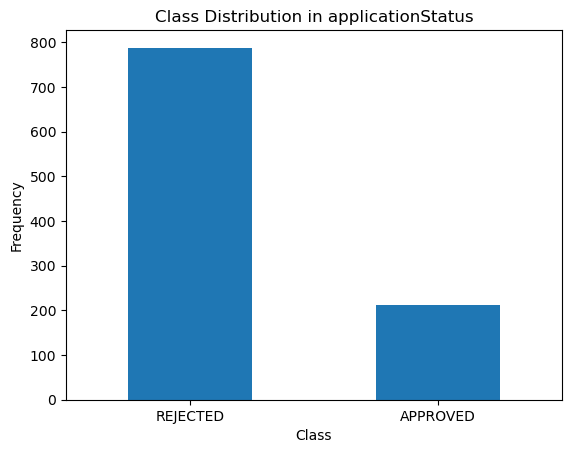

In [26]:
value_counts = df['applicationStatus'].value_counts()

print("Value counts for 'applicationStatus':")
print(value_counts)

value_counts.plot(kind='bar')
plt.title('Class Distribution in applicationStatus')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

The bar plot shows the class distribution of **applicationStatus**:

- REJECTED: 788 rows
- APPROVED: 212 rows

There is a significant class imbalance with more applications being rejected. This imbalance may bias the model towards predicting rejections. To address this, we will use SMOTE to balance the dataset.

### Drop unimportant columns

In [27]:
df = df.drop(columns=['id', 'address'])

### Encoding Categorical Data

In [28]:
le = LabelEncoder()
le_dict = dict()

cat_vars = df.select_dtypes(object).columns.values.tolist()


for var in cat_vars:
    df[var] = le.fit_transform(df[var])
    le_dict[var] = le.classes_.tolist()

display(df.head(3))

,ela,financeAmount,state,city,postcode,applicationStatus,netSalary,loanTenure,interestRate,loanApplied,jobTitle,loanReason
0,5000.0,5000.0,16,42,89,1,1900.0,18,18,5000,14,0
1,0.0,0.0,15,43,229,1,7260.0,24,18,10000,266,5
2,49000.0,6000.0,2,82,68,1,4000.0,24,18,6000,447,0


### Feature Selection

In this feature selection part, RFE (Recursive Feature Elimination) is chosen because it removes the least significant features efficiently until a specified number of features is reached. This helps in identifying the most important features that contribute to the model's performance. By selecting only the most important features, RFE helps in reducing overfitting and improving the model's performance by eliminating noise and irrelevant data.

##### Rank features

In [29]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order * np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks))

##### Get top N feature scores

In [30]:
def get_scores(n, feature_selector):
    scores = ranking(list(map(float, feature_selector.ranking_)), colnames, order=-1)
    scores = pd.DataFrame(list(scores.items()), columns=["Features", "Score"])
    scores = scores.sort_values("Score", ascending=False)
    return scores.head(n).reset_index(drop=True)

##### Create and train RFE feature selector

In [31]:
def train_fs(fs, X, y, n):
    fs.fit(X.values, y.values.ravel())
    return get_scores(n, fs)

def create_RFE_fs(model, X, y, n):
    fs = RFECV(model, n_jobs=-1, cv=3)
    return train_fs(fs, X, y, n)

##### Display and combine top features from multiple runs

In [32]:
def display_features(top_features):
    df_features = pd.DataFrame()
    for k in top_features.keys():
        df_features = pd.concat([df_features, pd.DataFrame(top_features[k])], axis=1)
    df_features.columns = pd.MultiIndex.from_tuples(
        list(product(top_features.keys(), ["Feature", "Score"])))
    display(df_features)
    return df_features

def combine_all_top_features(df_features):
    return list(set(np.ravel(df_features.filter(like="Feature", axis=1).values.tolist())))

In [33]:
n = 10

top_clf_features = dict()

In [34]:
targeted_variable = "applicationStatus"

X = df.drop(columns=[targeted_variable])
y = df[targeted_variable]
colnames = X.columns

features = create_RFE_fs(RandomForestClassifier(n_jobs=-1, class_weight="balanced", criterion="gini"), X, y, n)
top_clf_features["rfe_cri_gini"] = features

features = create_RFE_fs(RandomForestClassifier(n_jobs=-1, class_weight="balanced", criterion="entropy"), X, y, n)
top_clf_features["rfe_cri_entropy"] = features

features = create_RFE_fs(RandomForestClassifier(n_jobs=-1, class_weight="balanced", criterion="log_loss"), X, y, n)
top_clf_features["rfe_cri_log_loss"] = features

In [35]:
df_top_clf_features = display_features(top_clf_features)
selected_clf_features = combine_all_top_features(df_top_clf_features)
print("Selected Features:", selected_clf_features)

X_selected = X[selected_clf_features]

rfe_cri_gini       rfe_cri_entropy       rfe_cri_log_loss      
         Feature Score         Feature Score          Feature Score
0            ela   1.0             ela   1.0              ela   1.0
1  financeAmount   1.0   financeAmount   1.0    financeAmount   1.0
2          state   1.0        postcode   1.0         postcode   1.0
3           city   1.0       netSalary   1.0        netSalary   1.0
4       postcode   1.0     loanApplied   1.0      loanApplied   1.0
5      netSalary   1.0        jobTitle   1.0         jobTitle   1.0
6    loanApplied   1.0            city   0.8             city   0.8
7       jobTitle   1.0           state   0.6            state   0.6
8     loanReason   1.0      loanReason   0.4       loanReason   0.4
9     loanTenure   0.5      loanTenure   0.2       loanTenure   0.2

Selected Features: ['jobTitle', 'financeAmount', 'postcode', 'loanReason', 'netSalary', 'ela', 'loanTenure', 'loanApplied', 'city', 'state']


## Data Splitting

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Data Modeling

Random Forest classifier is chosen to predict the application status due to its robustness and inherent feature importance evaluation. Random Forest constructs multiple decision trees and combines their outputs, which reduces the risk of overfitting and enhances model stability. It can handle imbalanced datasets effectively by adjusting class weights, ensuring better performance on minority classes. Additionally, random forest provides feature importance, allowing for the identification of key variables that influence loan application outcomes, which is crucial for transparent and interpretable results in the banking industry. These qualities make Random Forest a reliable and accurate choice for building the predictive model in this project.

### Baseline Model (Before SMOTE and Hyperparameter Tuning)

##### Model initialization and training

In [37]:
model_baseline = RandomForestClassifier(random_state=42)
model_baseline.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### Predict on the testing set

In [38]:
y_pred_baseline = model_baseline.predict(X_test)

##### Model Evaluation

In [39]:
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, pos_label=0)
recall_baseline = recall_score(y_test, y_pred_baseline, pos_label=0)
f1_baseline = f1_score(y_test, y_pred_baseline, pos_label=0)

print(f'Baseline Model - Accuracy: {accuracy_baseline:.2f}')
print(f'Baseline Model - Precision: {precision_baseline:.2f}')
print(f'Baseline Model - Recall: {recall_baseline:.2f}')
print(f'Baseline Model - F1 Score: {f1_baseline:.2f}')

Baseline Model - Accuracy: 0.81
Baseline Model - Precision: 0.54
Baseline Model - Recall: 0.36
Baseline Model - F1 Score: 0.43


### Model with SMOTE

SMOTE (Synthetic Minority Oversampling Technique) is applied to solve the class imbalance in the dataset. SMOTE generates synthetic samples for the minority class by interpolating between existing samples, which helps in balancing the dataset. This technique improves the model's ability to learn from both classes. So that bias towards the majority class is reduced and overall model performance is enhanced.

##### Apply SMOTE to training data

In [40]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [41]:
print(f'Original dataset shape: {y_train.value_counts()}')
print(f'Resampled dataset shape: {y_train_smote.value_counts()}')

Original dataset shape: applicationStatus
1    627
0    173
Name: count, dtype: int64
Resampled dataset shape: applicationStatus
1    627
0    627
Name: count, dtype: int64


##### Model initialization and training

In [42]:
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

##### Predict on the testing set

In [43]:
y_pred_smote = model_smote.predict(X_test)

##### Model Evaluation

In [44]:
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote, pos_label=0)
recall_smote = recall_score(y_test, y_pred_smote, pos_label=0)
f1_smote = f1_score(y_test, y_pred_smote, pos_label=0)

print(f'SMOTE Model - Accuracy: {accuracy_smote:.2f}')
print(f'SMOTE Model - Precision: {precision_smote:.2f}')
print(f'SMOTE Model - Recall: {recall_smote:.2f}')
print(f'SMOTE Model - F1 Score: {f1_smote:.2f}')

SMOTE Model - Accuracy: 0.79
SMOTE Model - Precision: 0.47
SMOTE Model - Recall: 0.59
SMOTE Model - F1 Score: 0.52


### Model with Hyperparameter Tuning and SMOTE

Grid Search CV (Cross Validation) is applied for hyperparameter tuning. It helps to explore a predefined set of hyperparameters and determine the combination that yields the best model performance. Grid Search CV iteratively searches through the specified hyperparameter grid and evaluates each combination using cross-validation. It ensures a robust and unbiased selection of the optimal parameters. This process enhances the model's accuracy, precision, recall, and overall effectiveness by fine-tuning it for the dataset.

##### Model Initialization

In [45]:
model_grid = RandomForestClassifier(random_state=42)
print(model_grid.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


##### Hyperparameter Tuning with GridSearchCV

In [46]:
params = {
    "max_depth": [2, 3, 4],
    "min_samples_leaf": [0.04, 0.06],
    "max_features": [0.2, 0.4, 0.6, 0.8]
}

grid = GridSearchCV(estimator=model_grid, 
                    param_grid=params, 
                    scoring='accuracy', 
                    cv=10, 
                    verbose=3, 
                    n_jobs=-1)

##### Fit grid search to data and get best hyperparameters

In [47]:
grid.fit(X_train_smote, y_train_smote)

best_hyperparams = grid.best_params_
print(f"Best hyperparameters:\n{best_hyperparams}")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best hyperparameters:
{'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.04}


##### Model Training with Best Hyperparameters

In [48]:
model_tuned = RandomForestClassifier(**best_hyperparams, random_state=42)
model_tuned.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=4, max_features=0.8, min_samples_leaf=0.04,
                       random_state=42)

##### Predict on the Testing Set

In [49]:
y_pred_tuned = model_tuned.predict(X_test)

##### Model Evaluation

In [50]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, pos_label=0)
recall_tuned = recall_score(y_test, y_pred_tuned, pos_label=0)
f1_tuned = f1_score(y_test, y_pred_tuned, pos_label=0)

print(f'Tuned Model - Accuracy: {accuracy_tuned:.2f}')
print(f'Tuned Model - Precision: {precision_tuned:.2f}')
print(f'Tuned Model - Recall: {recall_tuned:.2f}')
print(f'Tuned Model - F1 Score: {f1_tuned:.2f}')

Tuned Model - Accuracy: 0.75
Tuned Model - Precision: 0.43
Tuned Model - Recall: 0.82
Tuned Model - F1 Score: 0.56


### Comparative Analysis

In [51]:
results = {
    'Baseline': {
        'accuracy': accuracy_baseline,
        'precision': precision_baseline,
        'recall': recall_baseline,
        'f1': f1_baseline
    },
    'SMOTE': {
        'accuracy': accuracy_smote,
        'precision': precision_smote,
        'recall': recall_smote,
        'f1': f1_smote
    },
    'Tuned + SMOTE': {
        'accuracy': accuracy_tuned,
        'precision': precision_tuned,
        'recall': recall_tuned,
        'f1': f1_tuned
    }
}

In [52]:
for model_name, metrics in results.items():
    print(f"{model_name} Model - Accuracy: {metrics['accuracy']:.2f}")
    print(f"{model_name} Model - Precision: {metrics['precision']:.2f}")
    print(f"{model_name} Model - Recall: {metrics['recall']:.2f}")
    print(f"{model_name} Model - F1 Score: {metrics['f1']:.2f}")
    print()

Baseline Model - Accuracy: 0.81
Baseline Model - Precision: 0.54
Baseline Model - Recall: 0.36
Baseline Model - F1 Score: 0.43

SMOTE Model - Accuracy: 0.79
SMOTE Model - Precision: 0.47
SMOTE Model - Recall: 0.59
SMOTE Model - F1 Score: 0.52

Tuned + SMOTE Model - Accuracy: 0.75
Tuned + SMOTE Model - Precision: 0.43
Tuned + SMOTE Model - Recall: 0.82
Tuned + SMOTE Model - F1 Score: 0.56



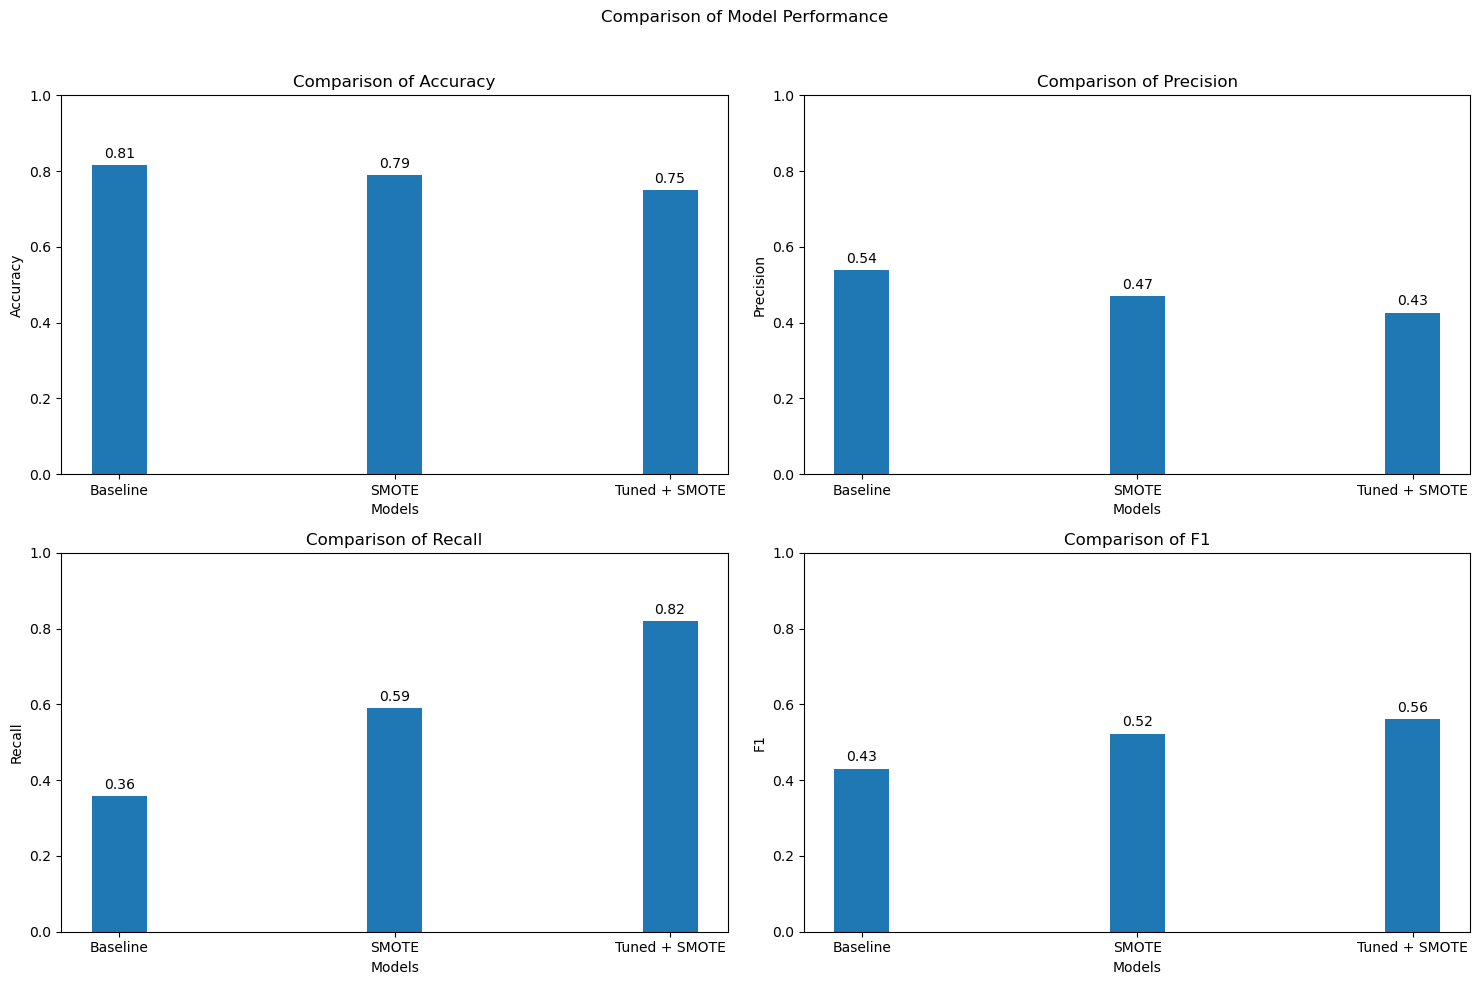

In [53]:
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(results))
width = 0.2

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparison of Model Performance')

for i, metric in enumerate(metrics):
    ax = plt.subplot(2, 2, i+1)
    values = [results[model][metric] for model in results]
    bars = ax.bar(x, values, width)
    ax.set_xlabel('Models')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'Comparison of {metric.capitalize()}')
    ax.set_xticks(x)
    ax.set_xticklabels(results.keys())
    ax.set_ylim(0, 1)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Graph above shows the performance of three different models: **Baseline**, **SMOTE**, and **Tuned + SMOTE**, across four key metrics: Accuracy, Precision, Recall, and F1 Score.

**Accuracy** <br>
The baseline model correctly predicts the application status 80% of the time. After applying SMOTE, the accuracy remains at 80%. This indicates that balancing the dataset did not impact the overall accuracy. After tuning, the accuracy decreases slightly to 75%, which might seem like a drop in performance, but it's important to consider other metrics, especially for imbalanced datasets.

**Precision** <br>
The model's precision is 48%, meaning that when it predicts an application will be approved, it is correct 48% of the time. The precision remains stable at 49% after applying SMOTE, suggesting that the model maintains its accuracy in predicting approvals even with balanced data. The precision drops slightly to 43% after hyperparameter tuning, indicating that tuning did not improve this metric and might have slightly decreased the model's accuracy in predicting approvals.

**Recall** <br>
The baseline model identifies 26% of actual approved applications, indicating it misses a significant portion of approved applications. The recall greatly improves to 62% after applying SMOTE, showing that the model is much better at identifying approved applications in a balanced dataset. After tuning, the recall further improves to 85%, demonstrating the benefit of both SMOTE and tuning in handling imbalanced data.

**F1 Score** <br>
The F1 score for the baseline model is 33%, providing a balance between precision and recall. The F1 score improves to 55% after applying SMOTE, showing a better balance between precision and recall due to increased recall. The F1 score further improves to 57% with hyperparameter tuning, indicating the model’s overall improved performance.

**Conclusion** <br>
The baseline model performs well in terms of accuracy but has lower recall, indicating it misses many approved applications. After applying SMOTE, the recall metric improves significantly, showing that the model is much better at identifying approved applications while maintaining stable precision and accuracy. This reflects a more balanced consideration of both classes. Hyperparameter tuning combined with SMOTE results in the best recall and F1 score, showing a significant improvement in identifying approved applications and achieving a better balance between precision and recall.